#  matplotlib-plotting-guide-Training

In [76]:
# always import like this
import matplotlib.pyplot as plt

In [77]:
%matplotlib inline

In [24]:
import numpy as np  # necessity
import pandas as pd  # necessity
#np.random.seed(100)  # random seed set for reproducibility

### Understanding matplotlib object structure

`pyplot` is wrapper around object oriented interface of Matplotlib. 

#### `plt.gca()`
It gives current axis that plot() references 

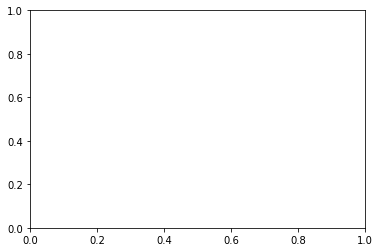

In [25]:
plt.gca()

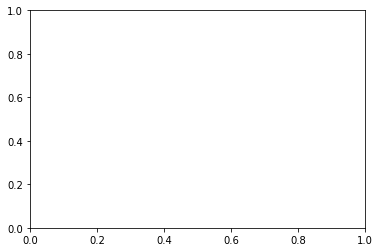

In [26]:
plt.subplot()

#### Anatomy of figure in matplotib

### Plotting basic example
Basic example on how to do plotting. Covers various aspects of Object Oriented plotting. Look carefully

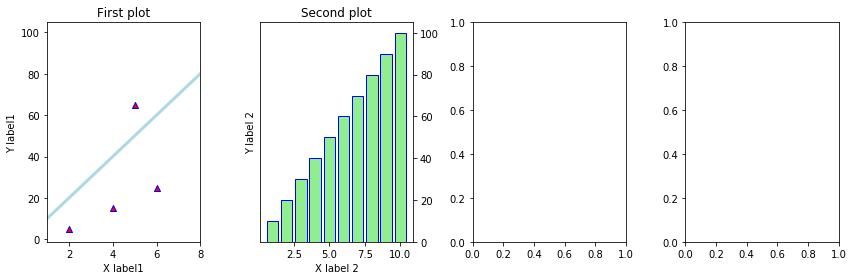

In [57]:
x = np.arange(1,11)
y1 = np.arange(10,101, 10)
y2 = np.arange(50,4,-5)
data = np.column_stack((y1, y2)) # just concatenating 2 column arrays


#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (12,4)) # 1st width, 2nd height
fig, (ax1, ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4, figsize = (12,4)) # 1st width, 2nd height

# customizing First Plot
ax1.plot(x, y1, color='lightblue', linewidth=3) # make line-plot on axis 1
ax1.scatter([2,4,6,5], [5,15,25, 65],           # add scatter plot in axis 1
           color='red',
           marker='^', 
            edgecolor = 'b')
ax1.set_xlim(1, 8)          # set limit of x axis
ax1.set_title('First plot') # set title
ax1.set_xlabel('X label1')
ax1.set_ylabel('Y label1')


# customizing Second Plot
ax2.bar(x, y1, color='lightgreen', linewidth=1, edgecolor = 'blue' ) # make bar-plot on axis 2
ax2.set_title('Second plot')
ax2.set_xlabel('X label 2')
ax2.set_ylabel('Y label 2')
ax2.yaxis.tick_right()

fig.tight_layout()

**Summary of what is happening in above exmaple:**    
* We create 1 row and 2 col figure. i.e. 2 axes objects in 1 row and 2 columns   
* We customize ax1 and ax2 individually. Observe that we can move y-ticks to right side for 2nd plot  

### Working with 2-D grids
subplot2grid

**Need?**  
To make plots in below format. 

![https://image.ibb.co/fkTWyc/grids.png](https://image.ibb.co/fkTWyc/grids.png)

Idea is to think of above figure as **2x4** grid. Then assign multiple grids to single plots to accomodate needed figure

In [58]:
y3 = [1,1,1,1,4,4,4,5,5,5,5,5,5,7,7,6]

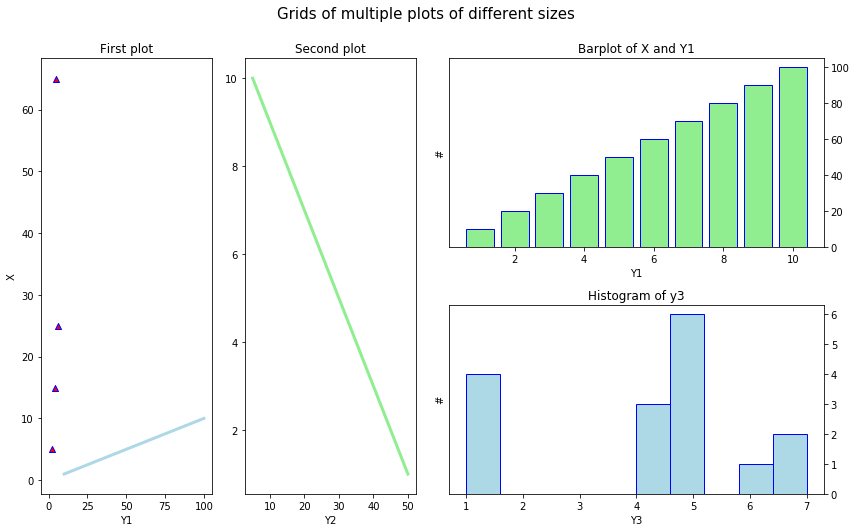

In [59]:
gridsize = (2, 4) # 4 rows, 2 columns
fig = plt.figure(figsize=(12, 7)) # this creates a figure without axes
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=2) # 2nd argument = origin of individual box
ax2 = plt.subplot2grid(gridsize, (0, 1), colspan=1, rowspan=2)
ax3 = plt.subplot2grid(gridsize, (0, 2), colspan=2, rowspan=1)
ax4 = plt.subplot2grid(gridsize, (1, 2), colspan=2, rowspan=1)

# Now that we have made multiple axes, we can customize each plot individually

# customizing axis 1
ax1.plot(y1, x, color='lightblue', linewidth=3) # make line-plot on axis 1
ax1.scatter([2,4,6,5], [5,15,25, 65],           # add scatter plot in axis 1
           color='red',
           marker='^', 
            edgecolor = 'b')
ax1.set_title('First plot') # set title
ax1.set_xlabel('Y1')
ax1.set_ylabel('X')

# customizing axis 2
ax2.plot(y2, x, color='lightgreen', linewidth=3) # make line-plot on axis 1
ax2.set_xlabel('Y2')
ax2.set_title('Second plot')

# customizing axis 3
ax3.bar(x,y1, color= 'lightgreen', edgecolor = 'b')
ax3.set_title('Barplot of X and Y1')
ax3.set_xlabel('Y1')
ax3.set_ylabel('#')
ax3.yaxis.tick_right()

# customizing axis 4
ax4.hist(y3, color = 'lightblue', edgecolor = 'b')
ax4.set_title('Histogram of y3')
ax4.set_xlabel('Y3')
ax4.set_ylabel('#')
ax4.yaxis.tick_right()

# super title of figure
fig.suptitle('Grids of multiple plots of different sizes ', y = 1.05, fontsize=15)

# clean up whitespace padding
fig.tight_layout()

**Key takeways**: 
* We can customize the layout of our plots using `subplot2grid`  
* We `plt.figure()` creates a figure with no axes. We can add axes manually later.
* We can use `fig.suptitle()` to set overall title of whole figure

### Colors, Color Bars, RGB Arrays & Color Maps

Sofar, we have used `ax.plot(), ax.scatter(), ax.bar() and ax.hist()` basic plots. One more commonly used wrapper is **`ax.imshow()`** which is used to show colormaps or images/ RGB arrays

In [60]:
# creating random array of integers values

img = np.random.randint(0,400,100)
img = img.reshape((10,10)) # 10x10 image

In [61]:
img

array([[134, 387,  28,  35, 275, 247, 242, 180, 378, 306],
       [302,  71,  49, 178, 232,  77, 186, 332, 355,   2],
       [121,  61, 316, 146,  35, 386,  55, 352,  63,  70],
       [382, 223, 107, 186,  82, 332, 188,  17,  33, 194],
       [ 18, 236,  66, 164, 369,   7, 356, 190, 129, 255],
       [333, 185, 348, 144, 352,  20, 338,  23, 355, 263],
       [333,  47, 274,  43, 343,  92, 251,   1,  91, 297],
       [333, 176,  89, 367, 187, 393,  50,  62, 305,  14],
       [ 90,   1, 135, 319, 120,  47, 369, 360, 282,  82],
       [ 51, 343, 266, 167, 354, 128, 257, 388, 314,   6]])

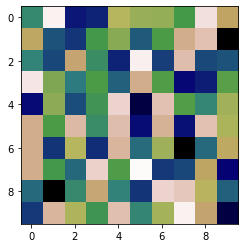

In [62]:
fig, ax = plt.subplots()
im = ax.imshow(img, cmap='gist_earth') # use of imshow 

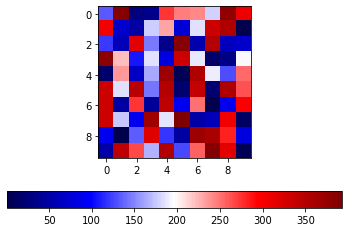

In [63]:
# adding a colorbar below plot to visualize the range of colors

im = ax.imshow(img, cmap='seismic')
fig.colorbar(im, orientation='horizontal')
fig

### Linestyles and linewidth 
Change widht, style color of lines

In [64]:
# let's see values of variables in case we forgot them

x,y1

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]))

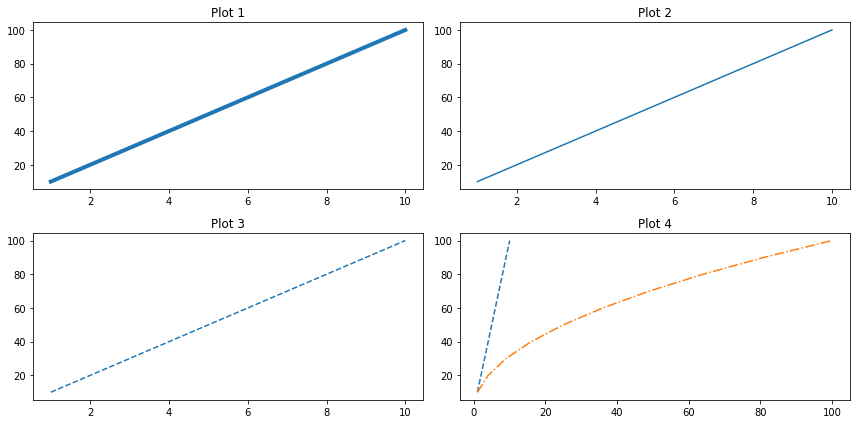

In [41]:
fig, axes = plt.subplots(2,2, figsize = (12,6)) # axes has all ax1 .. ax2 axes. 
ax1, ax2, ax3, ax4 = axes.flatten() # extracting all 4 axes using flatten

ax1.plot(x,y1, linewidth = 4) # set linewidth
ax1.set_title('Plot 1')

ax2.plot(x,y1, ls = 'solid')  # use solid line
ax2.set_title('Plot 2')

ax3.plot(x,y1, ls = '--') # dashed line
ax3.set_title('Plot 3')

ax4.plot(x,y1, '--', x**2, y1, '-.') # makes 2 lines. one dashed, other dotted dashed
ax4.set_title('Plot 4')


fig.tight_layout()

### Basic Data Distributions
Something we must do during EDA 

In [65]:
y3

[1, 1, 1, 1, 4, 4, 4, 5, 5, 5, 5, 5, 5, 7, 7, 6]

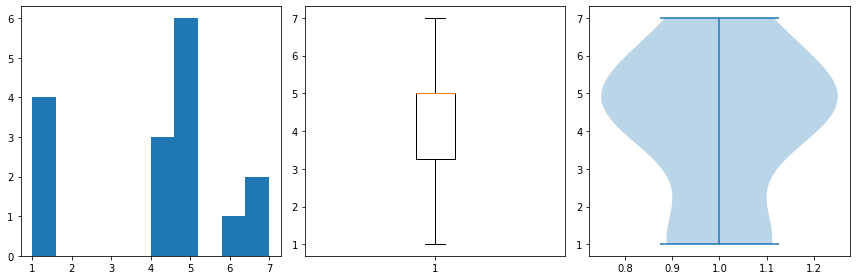

In [66]:
fig, axes = plt.subplots(1,3, figsize = (12,4))

# also we can directly index from axes variable
axes[0].hist(y3) # Plot a histogram
axes[1].boxplot(y3) # Make a box and whisker plot
axes[2].violinplot(y3) # violin plot

fig.tight_layout()

### Contours and Color grid for 2D arrays
Heatmap and contour map are really helpful to visualize 2d data in many cases

In [67]:
# cooking some data

data = 2 * np.random.random((10, 10))
data2 = 3 * np.random.random((10, 10))
data.shape, data2.shape

((10, 10), (10, 10))

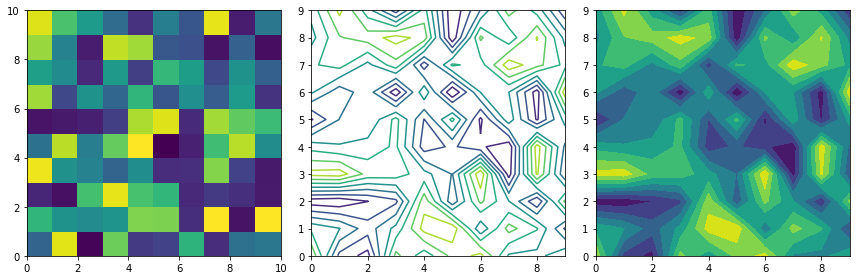

In [68]:
fig2, axes2 = plt.subplots(1,3, figsize = (12,4))

axes2[0].pcolor(data2)    # Pseudocolor plot of 2D array
axes2[1].contour(data)    # Contour plot
axes2[2].contourf(data)   # Filled contour plot

fig2.tight_layout()

### Adjustment, Margins and Scaling of plots
Last touch to make plots look nicer

#### Limits & Autoscaling

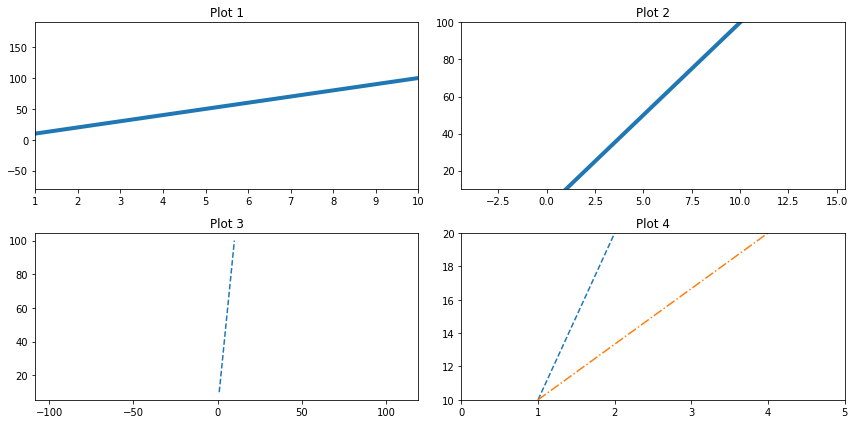

In [69]:
# copied pasted same line plots from above
fig, axes = plt.subplots(2,2, figsize = (12,6)) # axes has all ax1 .. ax2 axes. 
ax1, ax2, ax3, ax4 = axes.flatten() # extracting all 4 axes using flatten

ax1.plot(x,y1, linewidth = 4) # set linewidth
ax1.set_title('Plot 1')

ax2.plot(x,y1, linewidth = 4)  # use solid line
ax2.set_title('Plot 2')

ax3.plot(x,y1, ls = '--') # dashed line
ax3.set_title('Plot 3')

ax4.plot(x,y1, '--', x**2, y1, '-.') # makes 2 lines. one dashed, other dotted dashed
ax4.set_title('Plot 4')
ax4.set_label(['x', 'x_square'])

# setting margins now
ax1.margins(x=0.0,y=1)   # Add padding to a plot. a lot of padding to y, no paddig to x
ax2.margins(x=0.6,y=0)   # Add padding to a plot. a lot of padding to x, no paddig to y
ax3.axis('equal')        # Set the aspect ratio of the plot to 1. 
ax4.set(xlim=[0,5],
       ylim=[10,20])     # Set limits for x-and y-axis


fig.tight_layout()

**Things to notice:**
* **padding** automatically sets x axis or y axis grid scales  
* we can set x,y tick limits as we want using **xlim, ylim**

#### Ticks

In [70]:
x,y1

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]))

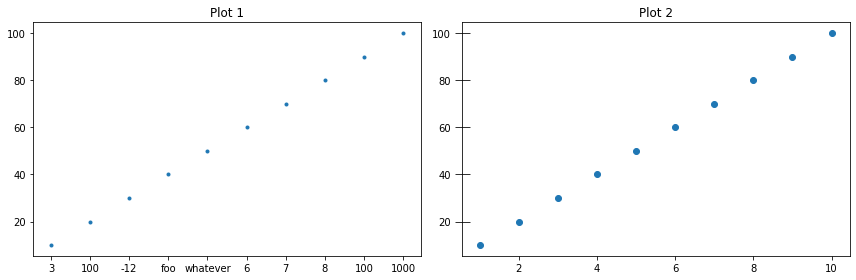

In [71]:
# basic scatter plots. bonus: see how to use marker
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,4)) # axes has all ax1 .. ax2 axes. 

ax1.scatter(x,y1, marker='.') # set linewidth
ax1.set_title('Plot 1')

ax2.scatter(x,y1, marker="o")  # use solid line
ax2.set_title('Plot 2')

ax1.xaxis.set(ticks=range(1,11), # Manually set x-ticks
 ticklabels=[3,100,-12,"foo", 'whatever', 6,7,8,100,1000])

ax2.tick_params(axis='y',  # Make y-ticks longer and go in and out
               direction='inout',
               length=15)

fig.tight_layout()

#### Axis lines

In [72]:
ax1.spines['top'].set_visible(False)    # Make the top axis line for a plot invisible
ax1.spines['right'].set_visible(False) # Make the right axis line for a plot invisible


ax2.spines['bottom'].set_position(('outward',30)) # set position of bottom axis outward by scale of 30

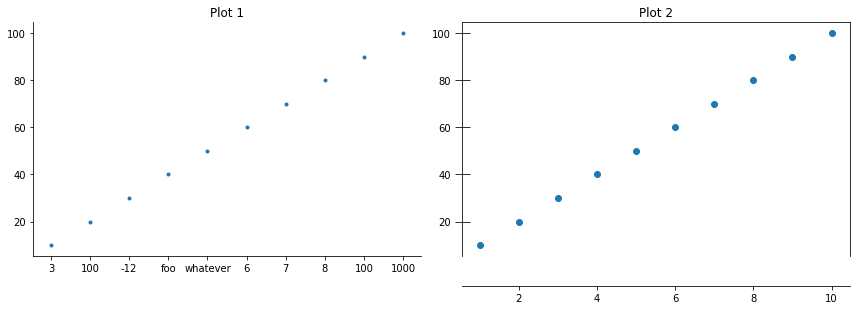

In [73]:
fig

### End